In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from preprocess import *

In [3]:
train = pd.read_csv('../dataset/train.csv')

In [4]:
train = preprocess(train)
train.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,...,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,-0.215296,0.953859,1.153373,1,-0.756758,0.003817,2,0,0.390471,2,...,0.698599,0.139017,4,0,1,0,0,0,1,0
1,0.284723,-0.850730,0.736555,1,1.072690,-1.526807,2,0,0.390471,2,...,-1.097204,-0.378139,4,1,0,0,0,0,1,0
2,-0.681362,-1.079612,-1.389627,1,-0.750642,-1.595563,3,0,0.390471,2,...,-1.213204,0.573087,2,1,0,1,0,0,0,0
3,2.658384,-1.624563,-0.236474,1,-0.750642,-1.073901,2,0,0.390471,2,...,-1.213204,-1.094386,4,1,0,1,0,0,0,0
4,-0.281148,-1.019812,-0.141517,1,-1.557855,0.597210,2,0,-2.135597,2,...,-0.869157,2.240560,4,1,0,0,0,0,1,0


In [5]:
# Random oversample to make the minority class instances equal to the majority class instances
oversample = RandomOverSampler(sampling_strategy='not majority')
X_train = train.drop(['Body_Level'], axis=1)
y_train = train['Body_Level']
X_over, y_over = oversample.fit_resample(X_train, y_train)

X_train = pd.DataFrame(X_over, columns=train.columns)
y_train = y_over

print(X_train.shape[0])

2020


In [6]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

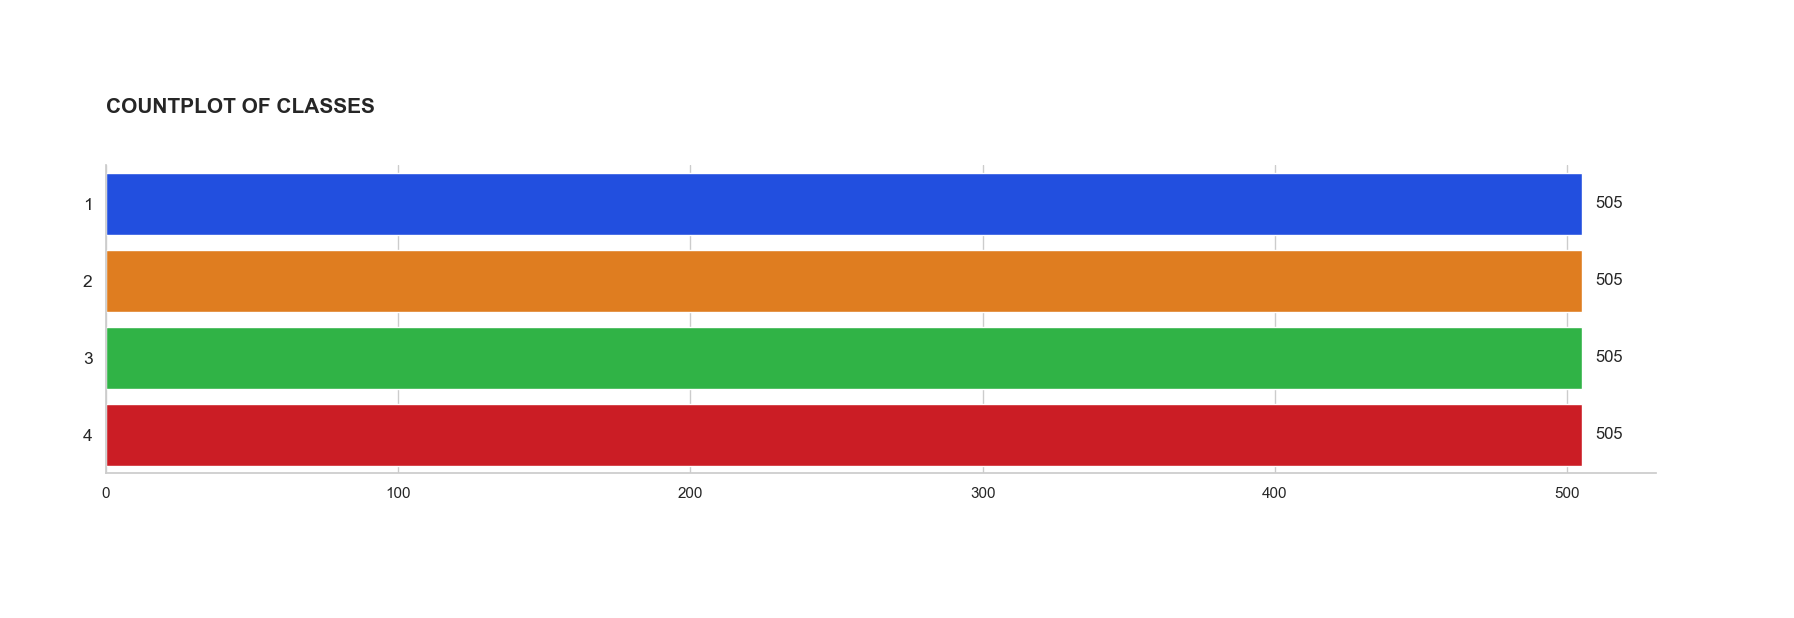

In [7]:
countPlot(y = y_train, title = 'Countplot of Classes', height = y_train.nunique())
piePlot(data = y_train, value = 'Percentage', name = 'Class', title = 'Class Distribution')  

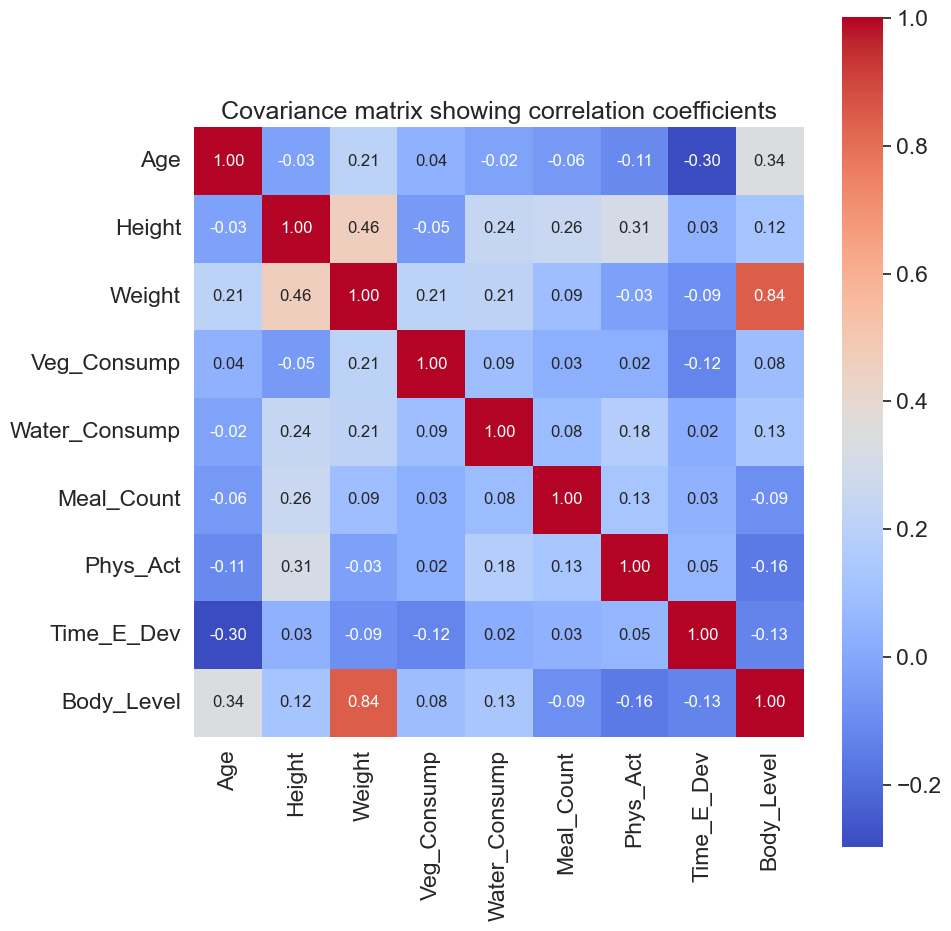

In [8]:
cols = train.select_dtypes(include=['float64']).columns.tolist()
cols.append('Body_Level')
temp_df = train.copy()
temp_df['Body_Level'] = StandardScaler().fit_transform(temp_df[['Body_Level']])
cov_mat = np.cov(temp_df[cols].values.T.astype(float))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

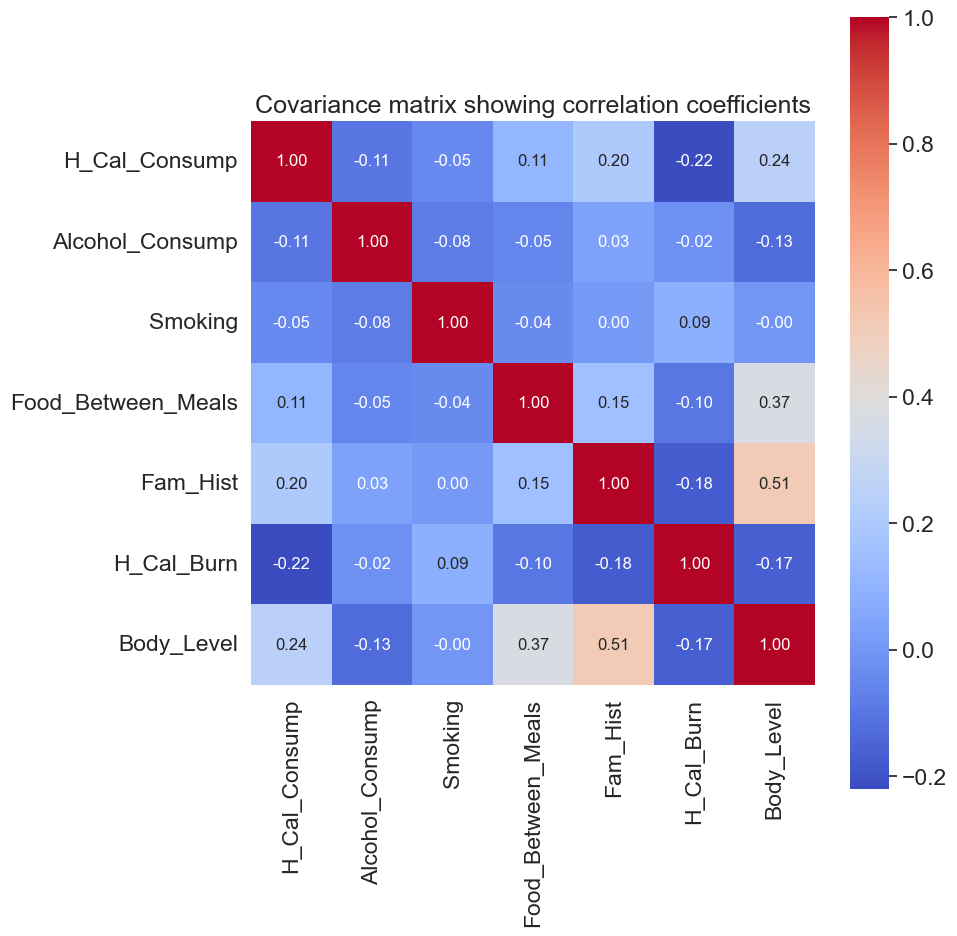

In [9]:
cols = ['H_Cal_Consump', 'Alcohol_Consump', 'Smoking', 'Food_Between_Meals', 'Fam_Hist', 'H_Cal_Burn', 'Body_Level']
temp_df = train.copy()
for col in cols:
    temp_df[col] = StandardScaler().fit_transform(temp_df[[col]])
    
cov_mat = np.cov(temp_df[cols].values.T.astype(float))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [10]:
cols = train.select_dtypes(include=['float64']).columns.tolist()

print("IQD outlier analysis")
for col in cols:
    IQD = train[col].quantile(0.75) - train[col].quantile(0.25)
    lower_boundary = train[col].quantile(0.25) - (IQD * 3)
    upper_boundary = train[col].quantile(0.75) + (IQD * 3)
    print(f'"{col}" attributes outliers are values less than {lower_boundary} or greater than {upper_boundary}')
    print(f'The number of outliers is {len([x for x in train[col].values if x < lower_boundary or x > upper_boundary])}')
    print('-------------------------------------------------------------------------------------------------')

IQD outlier analysis
"Age" attributes outliers are values less than -3.610180310483738 or greater than 3.209099044948636
The number of outliers is 8
-------------------------------------------------------------------------------------------------
"Height" attributes outliers are values less than -5.294989151041065 or greater than 5.229675092493048
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Weight" attributes outliers are values less than -5.5128608189804 or greater than 5.453363261725816
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Veg_Consump" attributes outliers are values less than -6.2206390338780535 or greater than 6.542686677716054
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Water_Consump" attributes outliers are values less than -5.34

In [11]:
train = remove_uncorrelated_features(train)
train.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Food_Between_Meals,Fam_Hist,...,Phys_Act,Time_E_Dev,Body_Level,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking
0,-0.215296,0.953859,1.153373,1,-0.756758,0.003817,2,0,2,1,...,0.698599,0.139017,4,0,1,0,0,0,1,0
1,0.284723,-0.850730,0.736555,1,1.072690,-1.526807,2,0,2,1,...,-1.097204,-0.378139,4,1,0,0,0,0,1,0
2,-0.681362,-1.079612,-1.389627,1,-0.750642,-1.595563,3,0,2,0,...,-1.213204,0.573087,2,1,0,1,0,0,0,0
3,2.658384,-1.624563,-0.236474,1,-0.750642,-1.073901,2,0,2,1,...,-1.213204,-1.094386,4,1,0,1,0,0,0,0
4,-0.281148,-1.019812,-0.141517,1,-1.557855,0.597210,2,0,2,1,...,-0.869157,2.240560,4,1,0,0,0,0,1,0


In [12]:
# Save the preprocessed dataset
train.to_csv('../dataset/train_preprocessed.csv', index=False)